# Boosting

На примерах урока мы увидели, что алгоритм XGBoost работает лучше и быстрее относительно GradientBoosting и AdaBoost. Поэтому в этом домашнем задании предлагаем посмотреть, какие еще интересные методы существуют в библиотеке для реализацией этого алгоритма.

### Важность признаков

Признаки, которые используют для обучения модели, оказывают большое влияние на ее качество. Неинформативные или слабо информативные признаки могут существенно понизить эффективность модели.

Отбор признаков – процесс выбора признаков, имеющих наиболее тесные взаимосвязи с целевой переменной. Он позволяет:
- уменьшить переобучение: чем меньше избыточных данных, тем меньше возможностей для модели принимать решения на основе «шума»
- повысить точность: чем меньше противоречивых данных, тем выше точность
- сократить время обучения: чем меньше данных, тем быстрее обучается модель

В библиотеке sckit-learn есть раздел feature_selection, который помогает автоматизировать этот процесс на основе методов статистики, линейной алгебры и некоторых специальных алгоритмов, таких как уже знакомый нам PCA - метод главных компонент.

Некоторые из таких методов реализованы в библиотеках для конкретных алгоритмов, к которым относится и xgboost.

Сгенерируем синтетические данные. 

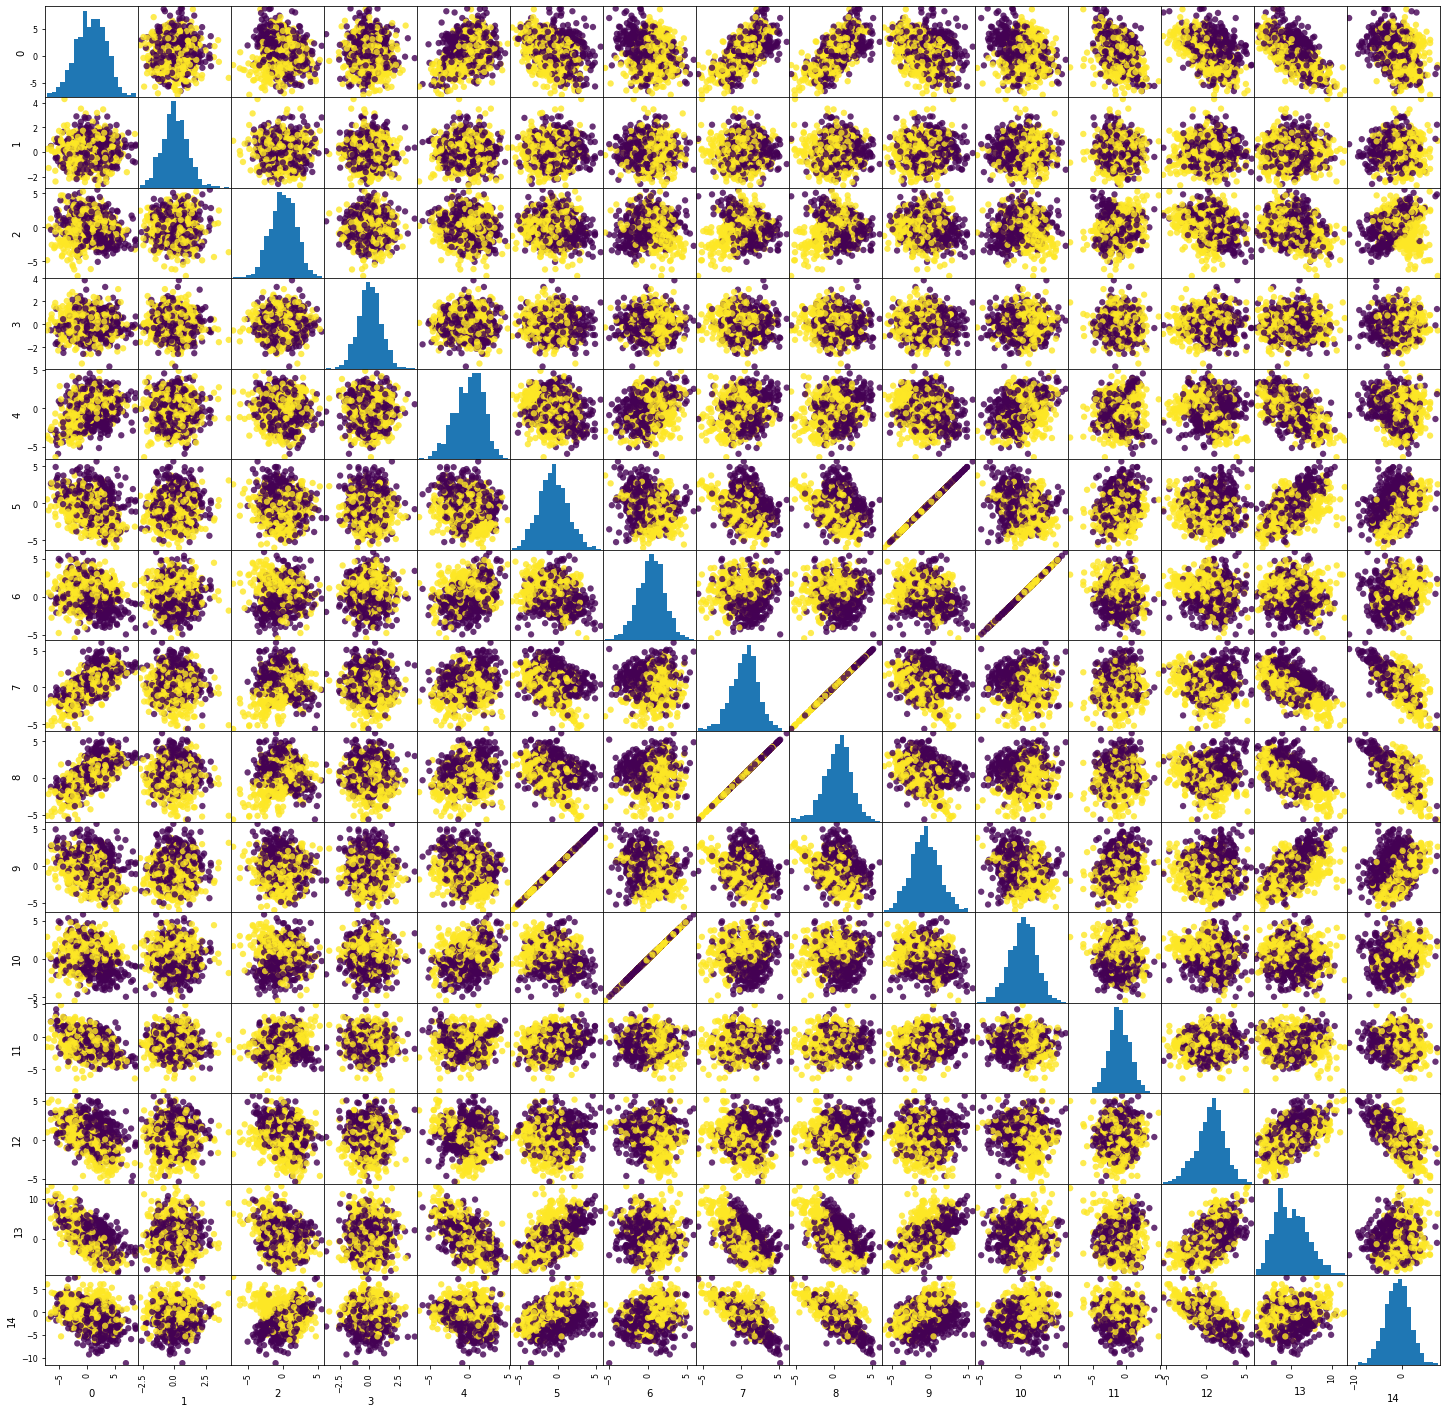

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd

X, Y = make_classification(n_samples=1000, n_features=15, n_informative=7, 
                           n_redundant=3, n_repeated=3, random_state=17)

Xt, Xv, Yt, Yv = train_test_split(X, Y, test_size=.3, stratify=Y, random_state=17)

features = pd.DataFrame(X)
targets = pd.Series(Y)

scat_mtrx = pd.plotting.scatter_matrix(features, c=targets, figsize=(25, 25), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

Теперь приступим к построению модели. В уроке мы разбирали алгоритм xgboost в интерфейсе библиотеки sklearn: для обучения использовали метод *fit* модели, а для предсказаний - *predict*.

Здесь будем использовать интерфейс библиотеки xgboost.

В этом интерфейсе для обучения XGBoost данные должны быть представлены в виде объекта DMatrix - внутренней структуры данных, используемой библиотекой  XGBoost, которая оптимизирована как по эффективности работы с памятью, так и по скорости обучения.

Также заранее определим параметры алгоритма:
- бинарная классификация - 'objective': 'binary:logistic'
- глубина деревьев - 'max_depth': 3
- шаг градиентного спуска (скорость обучения) - 'eta': 0.1
- количество итераций бустинга - num_rounds = 60

In [3]:
import xgboost as xgb

dtrain = xgb.DMatrix(Xt, Yt)
dtest = xgb.DMatrix(Xv, Yv)

params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 0.1}

num_rounds = 60

### 1.
С помощью метода *train* библиотеки xgboost обучите модель. Передайте в метод вышеопределенные словарь параметров, тренировочные данные в формате DMatrix и число итераций.

In [7]:
xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds)
xgb_model

### 2.
В методе *train* есть параметр *evals* - список валидационных наборов данных, для которых будут оцениваться показатели во время обучения. Они помогут нам отслеживать качество модели для каждой итерации.

Создайте список из двух кортежей (dtest, 'test') и (dtrain, 'train'). Снова определите метод train аналогично предыдущему пункту, добавив этот список в качестве параметра.

In [9]:
evals = [(dtrain, 'train'),(dtest, 'test')]
xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds, evals=evals)

[0]	train-error:0.191429	test-error:0.276667
[1]	train-error:0.195714	test-error:0.26
[2]	train-error:0.195714	test-error:0.26
[3]	train-error:0.195714	test-error:0.256667
[4]	train-error:0.194286	test-error:0.263333
[5]	train-error:0.18	test-error:0.243333
[6]	train-error:0.18	test-error:0.25
[7]	train-error:0.164286	test-error:0.25
[8]	train-error:0.155714	test-error:0.243333
[9]	train-error:0.151429	test-error:0.223333
[10]	train-error:0.145714	test-error:0.223333
[11]	train-error:0.14	test-error:0.22
[12]	train-error:0.134286	test-error:0.22
[13]	train-error:0.13	test-error:0.233333
[14]	train-error:0.125714	test-error:0.213333
[15]	train-error:0.128571	test-error:0.206667
[16]	train-error:0.124286	test-error:0.213333
[17]	train-error:0.115714	test-error:0.213333
[18]	train-error:0.114286	test-error:0.206667
[19]	train-error:0.115714	test-error:0.213333
[20]	train-error:0.114286	test-error:0.213333
[21]	train-error:0.111429	test-error:0.216667
[22]	train-error:0.11	test-error:0.216

### 3.
В качестве метрики оценки важности признаков в XGBoost используется F-score, которая вычисляется на основе того, как часто делалось разбиение по данному признаку.

Используйте метод plot_importance библиотеки XGBoost. Передайте туда в качестве параметра xgb_model.

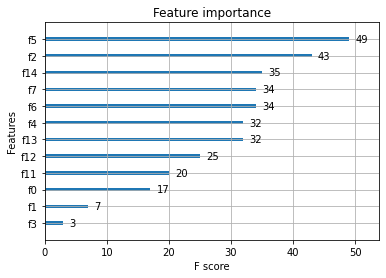

In [10]:
# ваш код
xgb.plot_importance(xgb_model)

По полученным данным можно посмотреть, какие признаки являются излишними и их можно убрать, а какие наиболее важны при обучении модели, т.е. используются чаще всего.

### Несбалансированные выборки

Мы уже упоминали о том, что работа с несбалансированными выборками несколько отличается от работы с идеальными датасетами. В XGBoost есть возможность несколько упростить эту работу: 
- задать большие веса некоторым объектам при инициализации DMatrix
- контролировать соотношение числа объектов разных классов с помощью параметра set_pos_weight

Сгенерируем несбалансированную выборку.

In [12]:
X, Y = make_classification(n_samples=1000, n_features=7, n_informative=3, n_redundant=3, 
                           n_classes=2, weights=[.9, .1], random_state=20)

print(f'There are {sum(y)} positive instances')

There are 104 positive instances


### 4.
Разбейте выборку на тренировочную и тестовую, соблюдая стратификацию по *y* и размер тестового датасета 0.3. Создайте объекты DMatrix для тренировочной и тестовой выборок.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# ваш код
Xt, Xv, Yt, Yv = train_test_split(X, Y, test_size=.3, stratify=Y, random_state=17)
dtrain = xgb.DMatrix(Xt, Yt)
dtest = xgb.DMatrix(Xv, Yv)

Зададим параметры для алгоритма и количество итераций.

In [ ]:
params = {'objective': 'binary:logistic', 
          'max_depth': 1, 
          'silent': 1, 
          'eta': 1}

num_rounds = 30

### 5.
С помощью метода train обучите модель. С помощью метода predict получите предсказания для тестовых данных. Так как алгоритм возвращает вероятности, получите бинарную матрицу значений этих вероятностей, элементы которой при полученной вероятности > 0.5 равны True, а при вероятности <= 0.5 равны False. Выведите эту матрицу.

In [27]:
import numpy as np
xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds)

y_pred = xgb_model.predict(xgb.DMatrix(Xv))
y_pred = np.array(list(map(lambda x: True if x > 0.5 else False, y_pred)))
y_pred

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

### 6.
Выведите матрицу ошибок, точность и полноту для полученных предсказаний.

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [28]:

print(confusion_matrix(Yv, y_pred))

print(precision_score(Yv, y_pred))

print(recall_score(Yv, y_pred))

[[263   6]
 [ 13  18]]
0.75
0.5806451612903226


Видно, что полнота гораздо ниже точности, т.е. алгоритм плохо распознает объекты класса, который представлен меньшим количеством экземпляров.

Теперь зададим вручную веса для экземпляров классов.

In [35]:
import numpy as np

weights = np.zeros(len(Yt))
weights[Yt == 0] = 1
weights[Yt == 1] = 5

### 7.
Повторите то же, что делали ранее: создайте объекты DMatrix - для тренировочных данных укажите веса, а для тестовых оставьте только сами данные; обучите модель и получите ее предсказания так же, как и в предыдущем случае. Выведите матрицу ошибок, точность и полноту.

In [36]:
# ваш код
#Xt, Xv, Yt, Yv = train_test_split(X, Y, test_size=.3, stratify=Y, random_state=17)
dtrain = xgb.DMatrix(Xt, Yt, weight=weights)
dtest = xgb.DMatrix(Xv, Yv)

xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds)
y_pred = xgb_model.predict(xgb.DMatrix(Xv))
y_pred = np.array(list(map(lambda x: True if x > 0.5 else False, y_pred)))

print(confusion_matrix(Yv, y_pred))
print(precision_score(Yv, y_pred))
print(recall_score(Yv, y_pred))


[[259  10]
 [  7  24]]
0.7058823529411765
0.7741935483870968


Можем увидеть, что значение полноты увеличилось, но при этом точность уменьшилась. Если нам важны обе метрики, то пригодится параметр scale_pos_weight в XGBoost.

### 8.
Снова создайте объекты DMatrix, как в первом случае (без задания весов).

In [34]:
# ваш код
dtrain = xgb.DMatrix(Xt, Yt)
dtest = xgb.DMatrix(Xv, Yv)

### 9.
Инициализируйте параметр scale_pos_weight как соотношение числа объектов двух классов. Для этого число объектов класса 0 разделите на число объектов класса 1. Добавьте в словарь параметров алгоритма params пару с ключом 'scale_pos_weight' и значением, равным полученному соотношению классов.

In [47]:
# ваш код
ratio = len(Yt[Yt == 1])/len(Yt[Yt == 0])
print(ratio)

params = {'objective': 'binary:logistic', 
          'max_depth': 1, 
          'silent': 1, 
          'eta': 1,
          'scale_pos_weight': ratio}

0.11642743221690591


### 10.
Обучите модель с параметрами params и получите ее предсказания для тестовой выборки. Выведите матрицу ошибок, точность и полноту.**

In [48]:
xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds)

y_pred = xgb_model.predict(xgb.DMatrix(Xv))
y_pred = np.array(list(map(lambda x: True if x > 0.5 else False, y_pred)))

print(confusion_matrix(Yv, y_pred))
print(precision_score(Yv, y_pred))
print(recall_score(Yv, y_pred))

[[254  15]
 [  7  24]]
0.6153846153846154
0.7741935483870968


Значение параметра scale_pos_weight надо выбирать в зависимости от желаемого соотношения между точностью и полнотой. Например, если нам нужны примерно одинаковые значения precision и recall, в данном случае следует уменьшить полученное значение параметра в несколько раз.